## Fig 2 g)

### Protein. Bone Marrow (BM) + Spleen (SPL) 
### ADT Density plots
---
##### mq224

Date: 2021-01-19

In [15]:
#SETTING ENVIRONMENT 
import rpy2

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

In [16]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [17]:
adata = sc.read("h5ad_part2/20210218_Laurenti_mq224_ADTwithmRNAlabels_postQC_filtered_DSB_FDG_BM_SPL_SIGAB11_SIGAD11.h5ad")

In [18]:
adata

AnnData object with n_obs × n_vars = 24322 × 198
    obs: 'Tissue', 'batch', 'leiden', 'louvain', 'leiden.1.2', 'Annotations.1.2'
    var: 'bg_mean'
    uns: 'Annotations.1.2_colors', 'Tissue_colors', 'draw_graph', 'leiden', 'leiden_colors', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [19]:
adata_tissue = adata.obs.groupby(["Tissue"]).apply(len)
adata_tissue

Tissue
BM     12500
SPL    11822
dtype: int64

In [20]:
from scipy import stats

def cell_kde(adata,
             coords = 'X_umap',
             bw_method = None,
             estimate_cell_densities = True):
    kde = stats.gaussian_kde(adata.obsm[coords].T, bw_method = bw_method)
    if estimate_cell_densities:
        return(kde(adata.obsm[coords].T))
    else:
        return(kde)

In [21]:
#Because SPL cells contains less cells than the rest of the tissues ~11800, we do a random sampling of that size 
#to show comparable densities between the 2 tissues.

In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

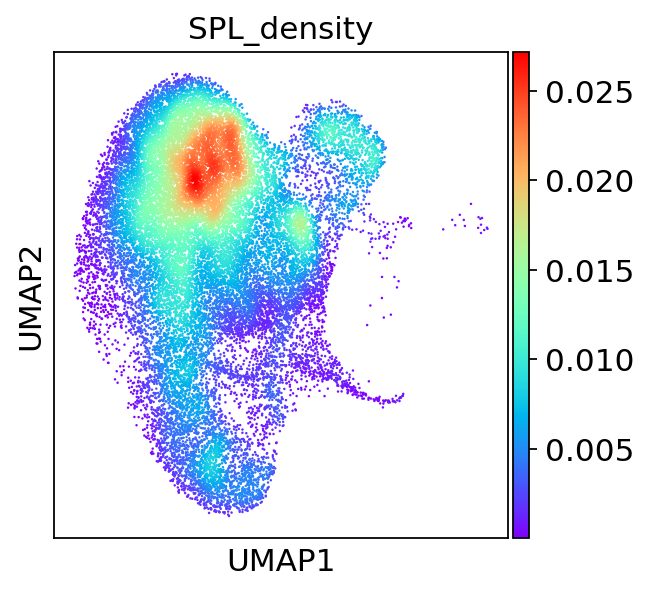

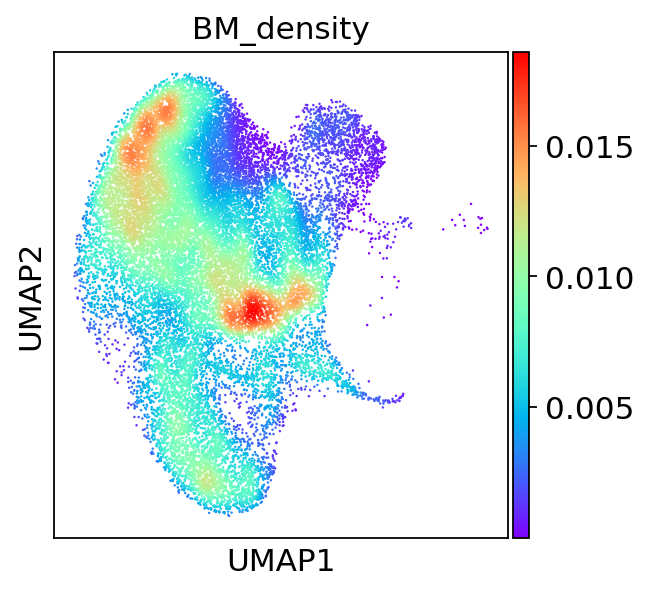

In [26]:
#'rainbow'
for i in adata.obs.Tissue.unique():
    temp = adata[adata.obs.index[adata.obs.Tissue == i],:].copy()
    sc.pp.subsample(temp, n_obs = 11800)
    kdf = cell_kde(temp,bw_method = 0.1,estimate_cell_densities = False)
    adata.obs[i + '_density'] = kdf(adata.obsm['X_umap'].T)
    sc.pl.umap(adata, color = i + '_density', cmap=cmaps['Miscellaneous'][12], save=i+"20210218_DSB_normalised_ADTbasedUMAPs_BM-SPL-densityplot")